In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
train = pd.read_csv("D:/coding/kaggle/zillow/data/train_2016.csv")
prop = pd.read_csv("D:/coding/kaggle/zillow/data/properties_2016.csv")

C:\Users\Abzooba\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train['date'] = pd.to_datetime(train['transactiondate'], format='%Y-%m-%d')

In [6]:
train.head()

,parcelid,logerror,transactiondate,date
0,11016594,0.0276,2016-01-01,2016-01-01
1,14366692,-0.1684,2016-01-01,2016-01-01
2,12098116,-0.0040,2016-01-01,2016-01-01
3,12643413,0.0218,2016-01-02,2016-01-02
4,14432541,-0.0050,2016-01-02,2016-01-02


In [7]:
prop.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [8]:
print train.shape
print prop.shape

(90811, 4)
(2985217, 58)


In [9]:
len(train['parcelid'].unique())

90682

In [10]:
train['logerror'].describe()

count    90811.000000
mean         0.010816
std          0.163288
min         -4.605000
25%         -0.026300
50%          0.005000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

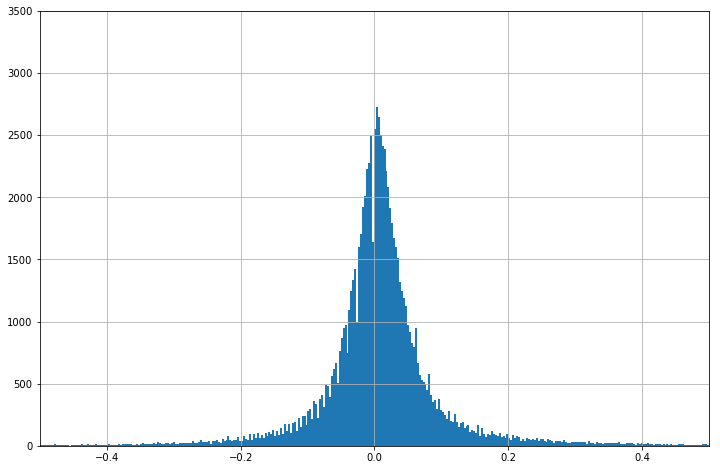

In [11]:
plt.figure(figsize=(12,8))
plt.hist(train['logerror'], bins='auto')
plt.axis([-0.5, 0.5, 0, 3500])
plt.grid(True)

In [12]:
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

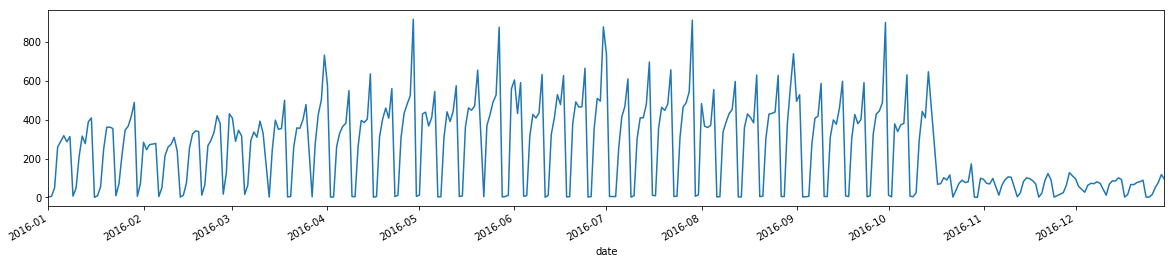

In [13]:
plt.figure(figsize=(20,4))
train.groupby(['date'])['parcelid'].count().plot()

In [14]:
def subDF(month):
    df = train[train['month']==month]
    return df.groupby(['day'])['parcelid'].count()

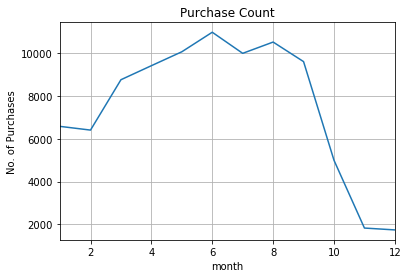

In [15]:
train.groupby(['month'])['day'].count().plot()
plt.grid(True)
plt.title("Purchase Count")
plt.grid(True)
plt.ylabel("No. of Purchases")

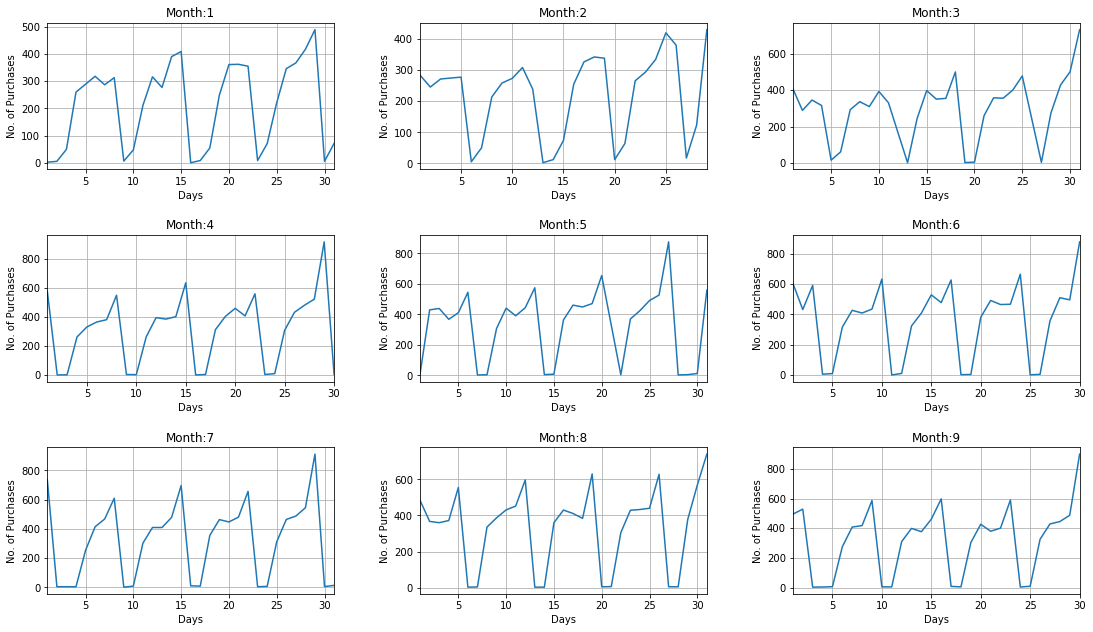

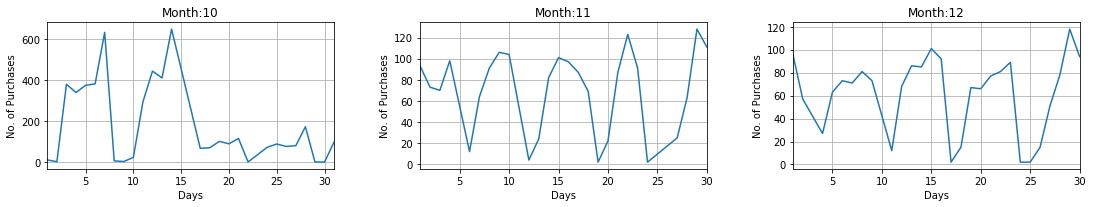

In [16]:
fig1 = plt.figure(1)
fig1.set_size_inches(18.5, 10.5)
plt.subplots_adjust( hspace=.45,wspace=0.3)
for m in range(1,10):

    plt.subplot(330+m)
    subDF(m).plot()
    plt.title('Month:'+str(m))
    plt.grid(True)
    plt.xlabel("Days")
    plt.ylabel("No. of Purchases")
    
fig2 = plt.figure(2)
fig2.set_size_inches(18.5, 10.5)
plt.subplots_adjust( hspace=.45,wspace=0.3)
for m in range(1,4):

    plt.subplot(330+m)
    subDF(m+9).plot()
    plt.title('Month:'+str(m+9))
    plt.grid(True)
    plt.xlabel("Days")
    plt.ylabel("No. of Purchases")

In [17]:
def subDFError(month):
    df = train[train['month']==month]
    aggregations = {
        'logerror':lambda x: abs(x).mean()
    }
    return df.groupby(['day']).agg(aggregations)

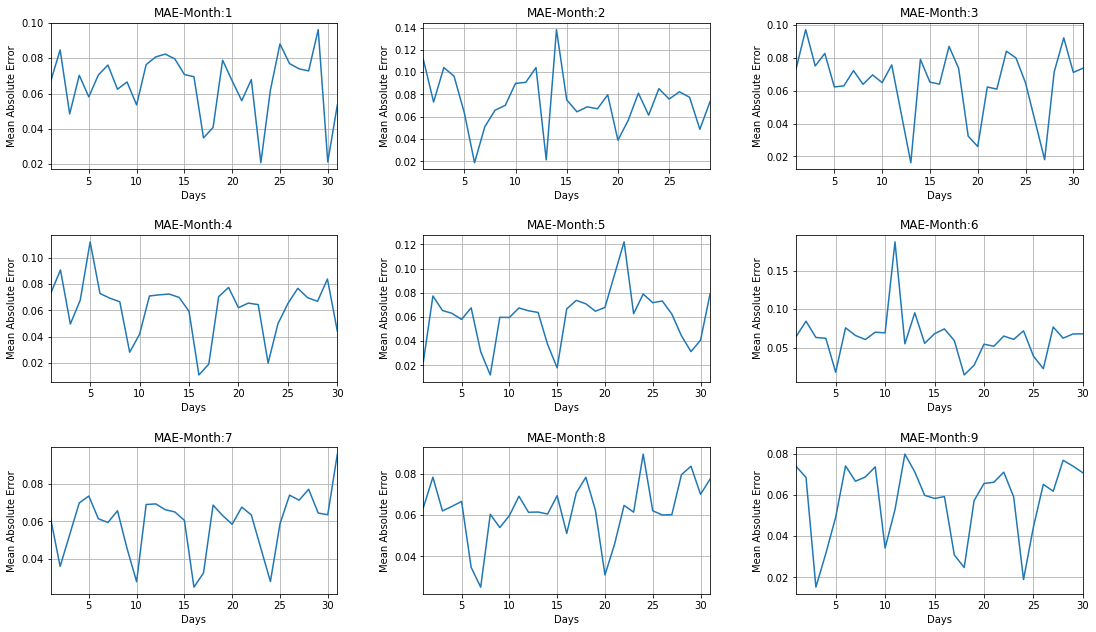

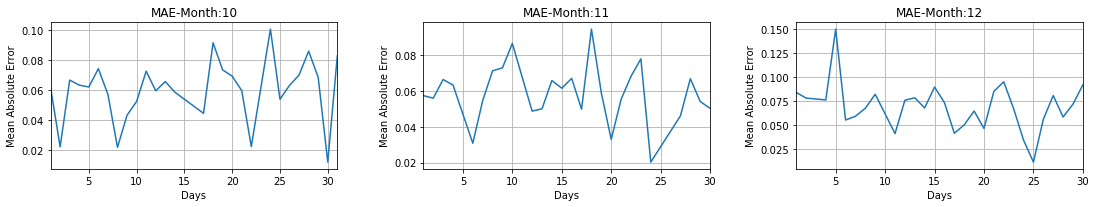

In [19]:
fig3 = plt.figure(3)
fig3.set_size_inches(18.5, 10.5)
plt.subplots_adjust( hspace=.45,wspace=0.3)
for m in range(1,10):

    plt.subplot(330+m)
    subDFError(m)['logerror'].plot()
    plt.title('MAE-Month:'+str(m))
    plt.grid(True)
    plt.xlabel("Days")
    plt.ylabel("Mean Absolute Error")
    
fig4 = plt.figure(4)
fig4.set_size_inches(18.5, 10.5)
plt.subplots_adjust( hspace=.45,wspace=0.3)
for m in range(1,4):
    plt.subplot(330+m)
    subDFError(m+9)['logerror'].plot()
    plt.title('MAE-Month:'+str(m+9))
    plt.grid(True)
    plt.xlabel("Days")
    plt.ylabel("Mean Absolute Error")

In [22]:
prop_null = prop.isnull().sum()/len(prop)*100

In [23]:
print prop_null

parcelid                         0.000000
airconditioningtypeid           72.815410
architecturalstyletypeid        99.796966
basementsqft                    99.945465
bathroomcnt                      0.383959
bedroomcnt                       0.383557
buildingclasstypeid             99.576949
buildingqualitytypeid           35.063749
calculatedbathnbr                4.318346
decktypeid                      99.427311
finishedfloor1squarefeet        93.209304
calculatedfinishedsquarefeet     1.861339
finishedsquarefeet12             9.246664
finishedsquarefeet13            99.743000
finishedsquarefeet15            93.608572
finishedsquarefeet50            93.209304
finishedsquarefeet6             99.263002
fips                             0.383121
fireplacecnt                    89.527160
fullbathcnt                      4.318346
garagecarcnt                    70.411967
garagetotalsqft                 70.411967
hashottuborspa                  97.688141
heatingorsystemtypeid           39